In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.sparse import csr_matrix


In [2]:
# Read data from Excel file

from google.colab import files
data=files.upload()

data=pd.read_excel('Diana.xlsx')

Saving Diana.xlsx to Diana.xlsx


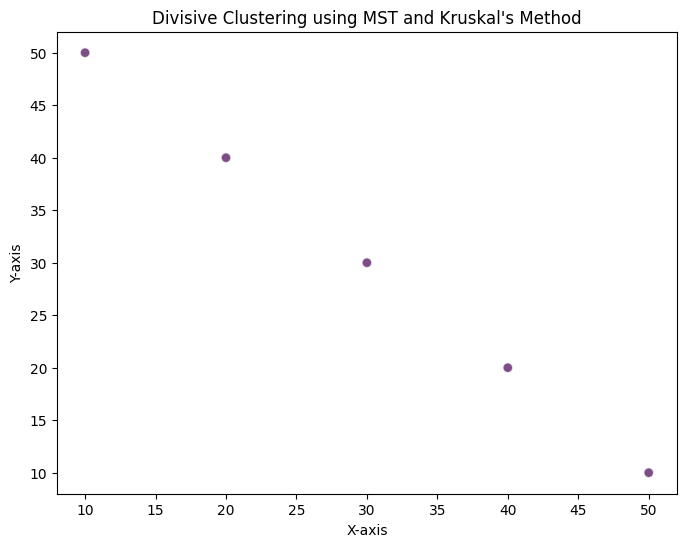

In [6]:

# Select columns for X and Y coordinates (adjust column names as needed)
x_col = 'x'
y_col = 'y'

# Extract X and Y coordinates
X = data[[x_col, y_col]].values

# Calculate Euclidean distance matrix
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Initialize a matrix to store pairwise distances
distances = np.zeros((len(X), len(X)))

# Calculate distances between each pair of points and fill the distance matrix
for i in range(len(X)):
    for j in range(i+1, len(X)):
        distances[i, j] = euclidean_distance(X[i], X[j])
        distances[j, i] = distances[i, j]

# Calculate Minimum Spanning Tree using scipy's minimum_spanning_tree
mst = minimum_spanning_tree(csr_matrix(distances)).toarray()

# Perform divisive clustering using Kruskal's method on the MST
def divisive_clustering(mst):
    clusters = [{i} for i in range(len(mst))]  # Each point initially in its own cluster
    n_clusters = len(mst)

    while n_clusters > 1:
        max_edge = np.unravel_index(np.argmax(mst), mst.shape)  # Find max edge in MST
        cluster_i = next((idx for idx, cluster in enumerate(clusters) if max_edge[0] in cluster), None)
        cluster_j = next((idx for idx, cluster in enumerate(clusters) if max_edge[1] in cluster), None)

        if cluster_i != cluster_j:
            clusters[cluster_i] |= clusters[cluster_j]  # Merge clusters
            clusters.pop(cluster_j)
            n_clusters -= 1

        mst[max_edge[0]][max_edge[1]] = 0
        mst[max_edge[1]][max_edge[0]] = 0  # Remove edge from MST

    return clusters

# Perform divisive clustering using MST and Kruskal's method
clusters = divisive_clustering(mst)

# Assign labels to the data points based on the clusters
cluster_labels = np.zeros(len(X), dtype=int)
for idx, cluster in enumerate(clusters):
    for point in cluster:
        cluster_labels[point] = idx

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.title('Divisive Clustering using MST and Kruskal\'s Method')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
